In [3]:
import pandas as pd

# 데이터 셋을 불러옵니다.

dataset = pd.read_csv('data/funda_train.csv')
dataset

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000
3,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.142857
4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000
...,...,...,...,...,...,...,...,...,...
6556608,2136,4663855,d,2019-02-28,23:20,0,제주 제주시,기타 주점업,-4500.000000
6556609,2136,4663855,d,2019-02-28,23:24,0,제주 제주시,기타 주점업,4142.857143
6556610,2136,4663489,a,2019-02-28,23:24,0,제주 제주시,기타 주점업,4500.000000
6556611,2136,4663856,d,2019-02-28,23:27,0,제주 제주시,기타 주점업,571.428571


In [4]:
# 데이터의 정보를 확인합니다
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6556613 entries, 0 to 6556612
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   store_id          int64  
 1   card_id           int64  
 2   card_company      object 
 3   transacted_date   object 
 4   transacted_time   object 
 5   installment_term  int64  
 6   region            object 
 7   type_of_business  object 
 8   amount            float64
dtypes: float64(1), int64(3), object(5)
memory usage: 450.2+ MB


In [5]:
dataset['region'].describe()[0]

4513847

In [6]:
# 지역 데이터의 종류를 확인한다.
dataset['region'].value_counts(dropna=False)

NaN       2042766
경기 수원시     122029
충북 청주시     116766
경남 창원시     107147
경남 김해시     100673
           ...   
경남 거창군       1143
서울 관악구       1037
경남 함안군        878
경북 영천시        849
전남 완도군        681
Name: region, Length: 181, dtype: int64

In [7]:
# 지역 데이터 Nan 값을 확인한다.
dataset['region'].isna().value_counts()

False    4513847
True     2042766
Name: region, dtype: int64

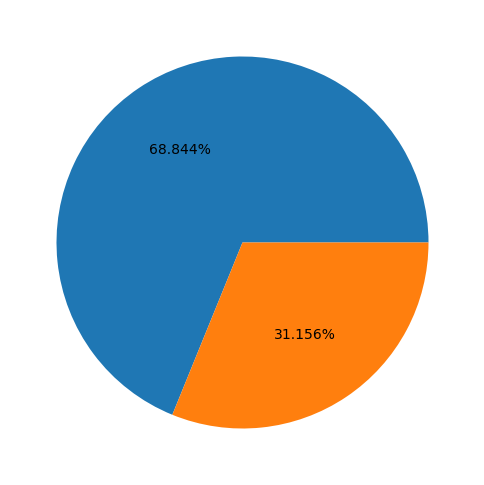

In [8]:
# Nan 값과 지역이 있는 값의 비율을 보여주는 그래프
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 9))
plt.pie(dataset.region.isna().value_counts(), autopct='%.3f%%')
plt.show()


In [9]:
grouped = dataset['amount'].groupby(dataset['region'])
#grouped = grouped.mean()
grouped


/Users/jeong-giho/.conda/envs/pythonProject4/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jeong-giho/.conda/envs/pythonProject4/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jeong-giho/.conda/envs/pythonProject4/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47497 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jeong-giho/.conda/envs/pythonProject4/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jeong-giho/.conda/envs/pythonProject4/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_t

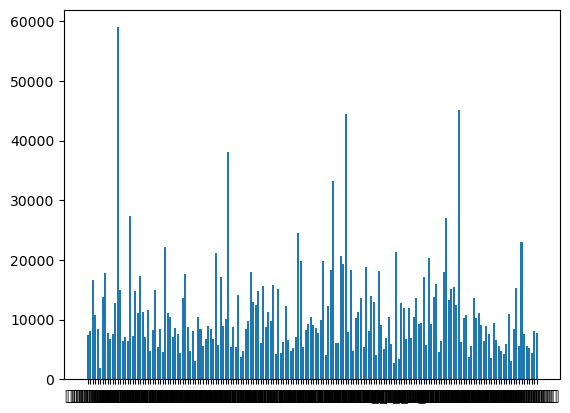

In [10]:
plt.figure()
plt.bar(grouped.mean().index, grouped.mean().values)
plt.show()
plt.tight_layout()

In [12]:
# 정규표현식으로 도별, 광역시별로 분류할 것임.

In [26]:
region_= dataset[{'region', 'amount'}]
region_

,amount,region
0,1857.142857,NaN
1,857.142857,NaN
2,2000.000000,NaN
3,7857.142857,NaN
4,2000.000000,NaN
...,...,...
6556608,-4500.000000,제주 제주시
6556609,4142.857143,제주 제주시
6556610,4500.000000,제주 제주시
6556611,571.428571,제주 제주시


In [12]:
region_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6556613 entries, 0 to 6556612
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   amount  float64
 1   region  object 
dtypes: float64(1), object(1)
memory usage: 100.0+ MB


In [25]:
#region_['big_region'] = 
#region_.region.str.extract('[가-힣]+')

#grouped = dataset['amount'].groupby(dataset['region'])

In [27]:
# fillna를 통해서 nan 값을 대치해줌
region_1 = region_.fillna('모름')
# 지역별로 amount를 묶음
region_2 = region_1['amount'].groupby(region_1['region'])
# 지역별 amount의 평균을 dataframe으로 만듦
region_3 = pd.DataFrame(region_2.mean())
region_3

,amount
region,
강원 강릉시,7409.415484
강원 삼척시,8023.419596
강원 속초시,16593.699141
강원 양구군,10799.438604
강원 원주시,8507.560292
...,...
충북 제천시,5655.039867
충북 증평군,5261.246131
충북 진천군,4370.129740


In [28]:
# index로 분류되어 있는 지역을 칼럼으로 지정하기 위해 인덱스 칼럼을 추가함
region_3.insert(0, column='index', value=range(0,181,1))
region_3

,index,amount
region,,
강원 강릉시,0,7409.415484
강원 삼척시,1,8023.419596
강원 속초시,2,16593.699141
강원 양구군,3,10799.438604
강원 원주시,4,8507.560292
...,...,...
충북 제천시,176,5655.039867
충북 증평군,177,5261.246131
충북 진천군,178,4370.129740


In [47]:
# index를 새로운 index로 지정함
region_4 = region_3.reset_index().set_index('index')
region_4

,region,amount
index,,
0,강원 강릉시,7409.415484
1,강원 삼척시,8023.419596
2,강원 속초시,16593.699141
3,강원 양구군,10799.438604
4,강원 원주시,8507.560292
...,...,...
176,충북 제천시,5655.039867
177,충북 증평군,5261.246131
178,충북 진천군,4370.129740


In [49]:
region_4.dtypes

region     object
amount    float64
dtype: object

In [70]:
import re
#p = re.compile('(\w+[울, 산, 천, 전, 주, 구, 주, 원, 기, 남, 북]\s*)?')
p = re.compile('[가-힣]+')

In [72]:
import numpy as np
b = (region_4['region'].tolist())
b

['강원 강릉시',
 '강원 삼척시',
 '강원 속초시',
 '강원 양구군',
 '강원 원주시',
 '강원 철원군',
 '강원 춘천시',
 '강원 태백시',
 '강원 홍천군',
 '강원 횡성군',
 '경기 가평군',
 '경기 고양시',
 '경기 과천시',
 '경기 광명시',
 '경기 광주시',
 '경기 구리시',
 '경기 군포시',
 '경기 김포시',
 '경기 남양주시',
 '경기 동두천시',
 '경기 부천시',
 '경기 성남시',
 '경기 수원시',
 '경기 시흥시',
 '경기 안산시',
 '경기 안성시',
 '경기 안양시',
 '경기 양주시',
 '경기 양평군',
 '경기 연천군',
 '경기 오산시',
 '경기 용인시',
 '경기 의왕시',
 '경기 의정부시',
 '경기 이천시',
 '경기 파주시',
 '경기 평택시',
 '경기 포천시',
 '경기 하남시',
 '경기 화성시',
 '경남 거제시',
 '경남 거창군',
 '경남 김해시',
 '경남 남해군',
 '경남 밀양시',
 '경남 사천시',
 '경남 양산시',
 '경남 진주시',
 '경남 창녕군',
 '경남 창원시',
 '경남 통영시',
 '경남 함안군',
 '경북 경산시',
 '경북 경주시',
 '경북 구미시',
 '경북 김천시',
 '경북 상주시',
 '경북 성주군',
 '경북 안동시',
 '경북 영주시',
 '경북 영천시',
 '경북 울진군',
 '경북 칠곡군',
 '경북 포항시',
 '광주 광산구',
 '광주 남구',
 '광주 동구',
 '광주 북구',
 '광주 서구',
 '대구 남구',
 '대구 달서구',
 '대구 달성군',
 '대구 동구',
 '대구 북구',
 '대구 서구',
 '대구 수성구',
 '대구 중구',
 '대전 대덕구',
 '대전 동구',
 '대전 서구',
 '대전 유성구',
 '대전 중구',
 '모름',
 '부산 강서구',
 '부산 금정구',
 '부산 기장군',
 '부산 남구',
 '부산 동구',
 '부산 동래구',
 '부산 부산진구',
 '부산 북구',
 '부산 사상구',
 '부

In [73]:
p.findall(b)

TypeError: expected string or bytes-like object